# 1.5 Text Mining

In [13]:
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Clean the Scraped File

In [2]:
# Load the raw scraped file
with open("alice_in_wonderland.txt", "r", encoding="utf-8") as f:
    text = f.read()

# Remove things like [96]
text = re.sub(r"\[\d+\]", "", text)

# Optional: remove leftover citation formats
text = re.sub(r"\s{2,}", " ", text)

# Save cleaned version
with open("alice_cleaned.txt", "w", encoding="utf-8") as f:
    f.write(text)

## Tokenize and Plot Word Frequency

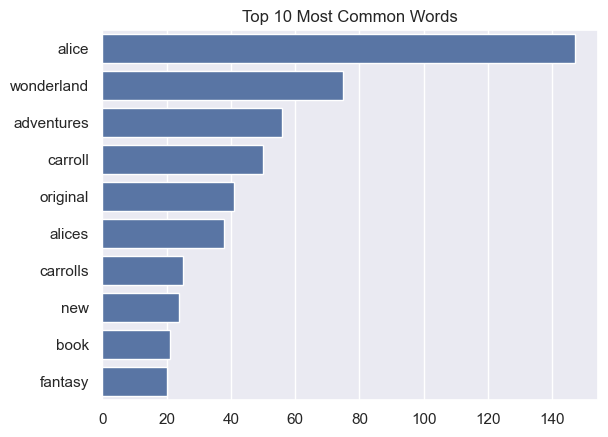

In [49]:
# Load cleaned text
with open("alice_cleaned.txt", "r", encoding="utf-8") as f:
    text = f.read()

# Tokenize
words = word_tokenize(text.lower())

# Remove stopwords and punctuation
stop_words = set(stopwords.words("english"))
clean_words = [word for word in words if word not in stop_words and word not in string.punctuation]

# Most common words
word_freq = Counter(clean_words)
most_common = word_freq.most_common(10)

# Plot
sns.barplot(x=[item[1] for item in most_common], y=[item[0] for item in most_common])
plt.title("Top 10 Most Common Words")
plt.show()

In [16]:
myfile = open('alice_cleaned.txt', encoding='utf-8') 

In [17]:
with open('alice_cleaned.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

In [20]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 2896 samples and 8124 outcomes>


In [21]:
dist_words.most_common(10)

[(',', 524),
 ('the', 351),
 ('(', 230),
 (')', 230),
 ('in', 202),
 ('.', 187),
 ('of', 180),
 ('a', 149),
 ('Alice', 133),
 ('and', 131)]

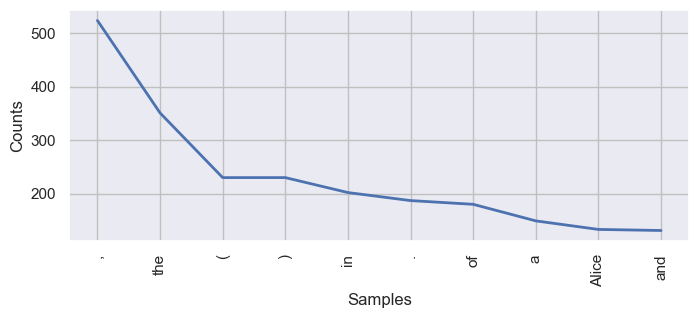

In [23]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

#### After removing stopwords and punctuation, the most frequent words seem to reflect key themes in the book like characters or recurring motifs.

## POS Tagging

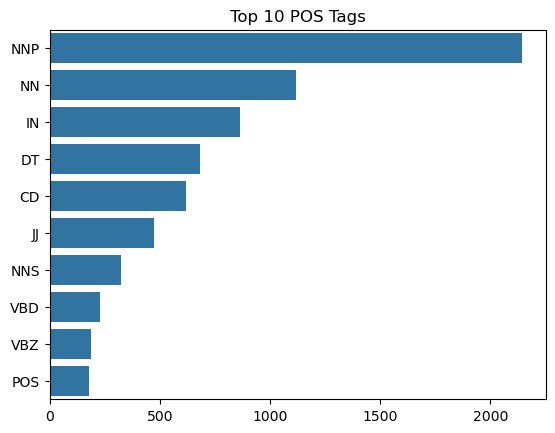

In [7]:
blob = TextBlob(text)
tags = blob.tags

# Count POS
pos_counts = Counter(tag for word, tag in tags)
top_pos = pos_counts.most_common(10)

# Plot
sns.barplot(x=[item[1] for item in top_pos], y=[item[0] for item in top_pos])
plt.title("Top 10 POS Tags")
plt.show() 

## POS-specific Bar Charts (Nouns, Verbs, Adjectives)

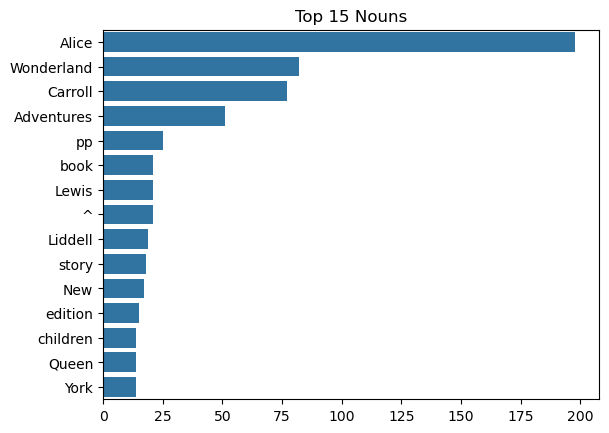

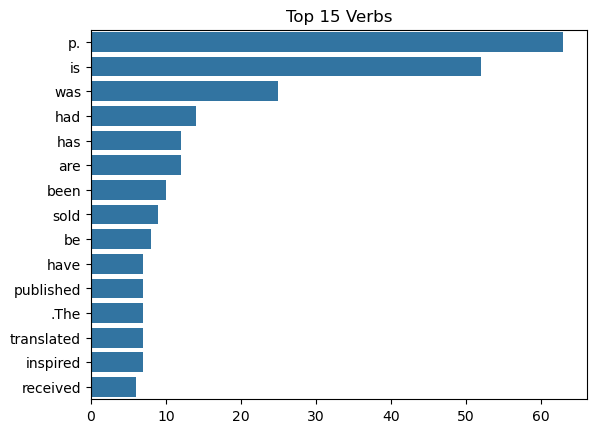

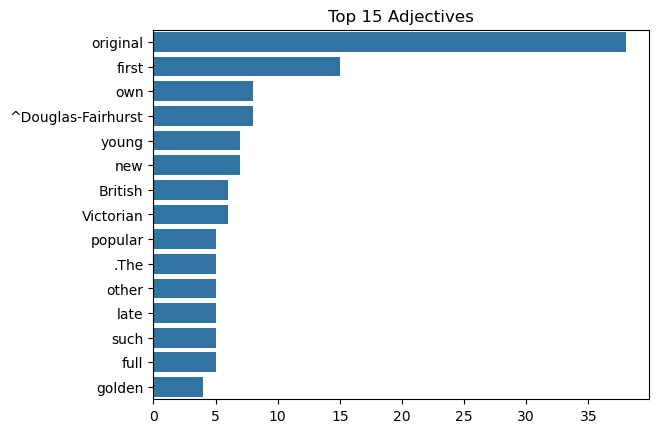

In [8]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))nouns = [word for word, tag in tags if tag.startswith("NN")]
verbs = [word for word, tag in tags if tag.startswith("VB")]
adjectives = [word for word, tag in tags if tag.startswith("JJ")]

for label, group in {"Nouns": nouns, "Verbs": verbs, "Adjectives": adjectives}.items():
    top = Counter(group).most_common(15)
    sns.barplot(x=[count for word, count in top], y=[word for word, count in top])
    plt.title(f"Top 15 {label}")
    plt.show() 

#### The following three charts display the top 15 most frequent nouns, verbs, and adjectives in the text. 

- **Nouns** typically represent people, places, and things — revealing key subjects or entities discussed in the article.
- **Verbs** reflect actions or events — showing what activities or movements are most emphasized.
- **Adjectives** highlight descriptive language — providing tone or emphasis in the narrative.

<Axes: title={'center': "Top 10 Bigrams in Alice's Adventures"}, xlabel='Samples', ylabel='Counts'>

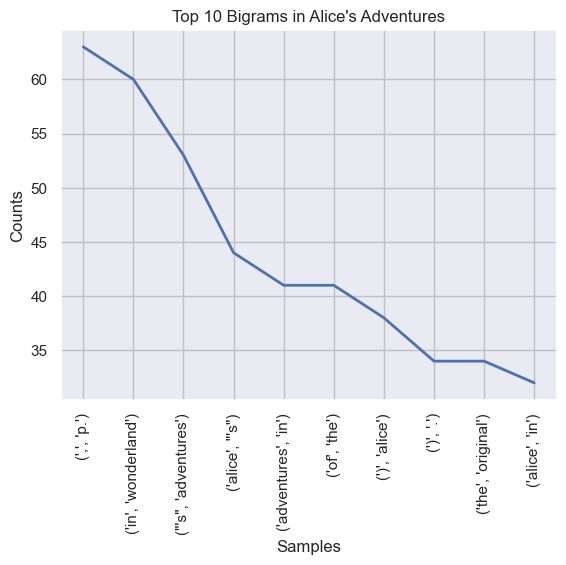

In [47]:
tokens = nltk.word_tokenize(text.lower())
bigrams_list = list(bigrams(tokens))
bigram_freq = FreqDist(bigrams_list)

# Plot top 10 bigrams
bigram_freq.plot(10, title='Top 10 Bigrams in Alice\'s Adventures')

## Country Frequency

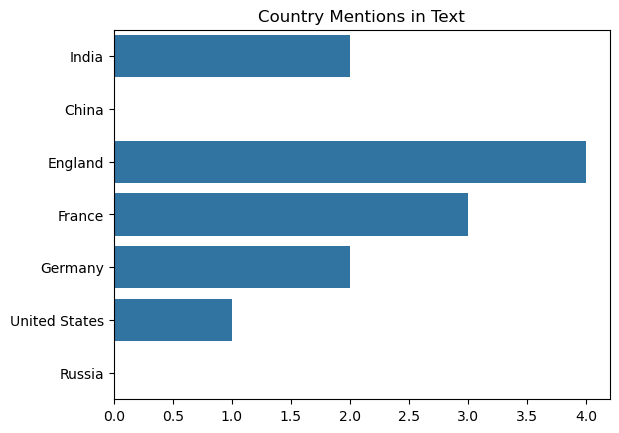

In [9]:
countries = ["India", "China", "England", "France", "Germany", "United States", "Russia"]

country_counts = {country: text.count(country) for country in countries}

sns.barplot(x=list(country_counts.values()), y=list(country_counts.keys()))
plt.title("Country Mentions in Text")
plt.show()

#### This chart displays how often specific countries were mentioned in the scraped text. The frequency of mentions can give insight into the geographical focus of the article or historical text. For example, high mention counts for countries like England, France, or India could suggest their prominence in the narrative or historical events covered. An absence of certain expected countries might indicate gaps in the data or bias in the source.


In [46]:
def lexical_diversity(text):
    words = text.split()
    return len(set(words)) / len(words)

print("Lexical Diversity:", lexical_diversity(text))


Lexical Diversity: 0.47542304593070106
